In [1]:
from __future__ import print_function, division

%matplotlib inline

# import libraries

import numpy as np
import thinkstats2
import thinkplot
import pandas
from collections import Counter
import analytic
import random
import scipy.stats
import analytic
import hinc
from thinkstats2 import Mean, MeanVar, Var, Std, Cov
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sn
# importing regex module (search strings) RegEx can be used to check if a string contains the specified search pattern
import re
import patsy #stats
from tabulate import tabulate

# import data set
dfClaims = pandas.read_csv('FradulentInsuranceClaims.csv')


In [2]:
# rename difficult column names
dfClaims.rename(columns={'capital-gains': 'capital_gains', 'capital-loss': 'capital_loss'}, inplace=True)
#dfClaims.columns

In [3]:
# split policy_csl into separate columns

# new data frame with split value columns 
newDF = dfClaims["policy_csl"].str.split("/", n = 1, expand = True)

# making separate csl_bodily column from new data frame 
dfClaims["csl_bodily"] = newDF[0] 
  
# making separate csl_property column from new data frame 
dfClaims["csl_prop"] = newDF[1] 
  
# Dropping old policy_csl columns 
dfClaims.drop(columns =["policy_csl"], inplace = True) 
  

In [4]:
dfClaims["csl_bodily"] = dfClaims["csl_bodily"].astype(int)
dfClaims["csl_prop"] = dfClaims["csl_prop"].astype(int)


In [5]:
# drop umbrella outlier observation
#dfClaims[dfClaims.umbrella_limit >= 0]
dfClaims.drop(dfClaims[dfClaims['umbrella_limit'] < 0].index, inplace = True)

In [6]:
dfClaims.drop(columns =["_c39"], inplace = True)

In [7]:
# changing date format for date columns 
dfClaims["incident_date"]= pandas.to_datetime(dfClaims["incident_date"])
dfClaims["policy_bind_date"]= pandas.to_datetime(dfClaims["policy_bind_date"])

In [8]:
# create new column for diff in months between policy_bind_date and incident_date
dfClaims['months_bf_incident'] = ((dfClaims.incident_date - dfClaims.policy_bind_date)/np.timedelta64(1, 'M'))

In [9]:
# Dropping old incident_date and policy_bind_date columns 
dfClaims.drop(columns =["incident_date"], inplace = True)
dfClaims.drop(columns =["policy_bind_date"], inplace = True)

In [10]:
# how many fraud reported yes
fraudY = dfClaims[dfClaims['fraud_reported'] == 'Y']
fraudY.shape

In [11]:
# how many fraud reported yes
fraudN = dfClaims[dfClaims['fraud_reported'] == 'N']
fraudN.shape

(752, 39)

In [12]:
# subset for fraud reported is yes
rowsYesFraud = dfClaims['fraud_reported'] == 'Y'
#columnsYesFraud = ['age', 'total_claim_amount', 'witnesses']
fraudY2 = dfClaims.loc[rowsYesFraud, ]

In [13]:
# subset for fraud reported is no
rowsNoFraud = dfClaims['fraud_reported'] == 'N'
#columnsNoFraud = ['age', 'total_claim_amount', 'witnesses']
fraudN2 = dfClaims.loc[rowsNoFraud, ]

In [14]:
# factorize categorical from strings to numberics in dfClaims df
dfClaims['fraud_reported_f'] = pandas.factorize(dfClaims.fraud_reported)[0]
dfClaims['policy_state_f'] = pandas.factorize(dfClaims.policy_state)[0]
dfClaims['insured_sex_f'] = pandas.factorize(dfClaims.insured_sex)[0]
dfClaims['insured_education_level_f'] = pandas.factorize(dfClaims.insured_education_level)[0]
dfClaims['insured_occupation_f'] = pandas.factorize(dfClaims.insured_occupation)[0]
dfClaims['insured_hobbies_f'] = pandas.factorize(dfClaims.insured_hobbies)[0]
dfClaims['insured_relationship_f'] = pandas.factorize(dfClaims.insured_relationship)[0]
dfClaims['incident_type_f'] = pandas.factorize(dfClaims.incident_type)[0]
dfClaims['collision_type_f'] = pandas.factorize(dfClaims.collision_type)[0]
dfClaims['incident_severity_f'] = pandas.factorize(dfClaims.incident_severity)[0]
dfClaims['authorities_contacted_f'] = pandas.factorize(dfClaims.authorities_contacted)[0]
dfClaims['incident_state_f'] = pandas.factorize(dfClaims.incident_state)[0]
dfClaims['incident_city_f'] = pandas.factorize(dfClaims.incident_city)[0]
dfClaims['property_damage_f'] = pandas.factorize(dfClaims.property_damage)[0]
dfClaims['police_report_available_f'] = pandas.factorize(dfClaims.police_report_available)[0]
dfClaims['auto_make_f'] = pandas.factorize(dfClaims.auto_make)[0]
dfClaims['auto_model_f'] = pandas.factorize(dfClaims.auto_model)[0]

In [15]:
# factorize categorical from strings to numberics in fraudY2 df

pandas.set_option('mode.chained_assignment', None)

fraudY2['fraud_reported_f'] = pandas.factorize(fraudY2.fraud_reported)[0]
fraudY2['policy_state_f'] = pandas.factorize(fraudY2.policy_state)[0]
fraudY2['insured_sex_f'] = pandas.factorize(fraudY2.insured_sex)[0]
fraudY2['insured_education_level_f'] = pandas.factorize(fraudY2.insured_education_level)[0]
fraudY2['insured_occupation_f'] = pandas.factorize(fraudY2.insured_occupation)[0]
fraudY2['insured_hobbies_f'] = pandas.factorize(fraudY2.insured_hobbies)[0]
fraudY2['insured_relationship_f'] = pandas.factorize(fraudY2.insured_relationship)[0]
fraudY2['incident_type_f'] = pandas.factorize(fraudY2.incident_type)[0]
fraudY2['collision_type_f'] = pandas.factorize(fraudY2.collision_type)[0]
fraudY2['incident_severity_f'] = pandas.factorize(fraudY2.incident_severity)[0]
fraudY2['authorities_contacted_f'] = pandas.factorize(fraudY2.authorities_contacted)[0]
fraudY2['incident_state_f'] = pandas.factorize(fraudY2.incident_state)[0]
fraudY2['incident_city_f'] = pandas.factorize(fraudY2.incident_city)[0]
fraudY2['property_damage_f'] = pandas.factorize(fraudY2.property_damage)[0]
fraudY2['police_report_available_f'] = pandas.factorize(fraudY2.police_report_available)[0]
fraudY2['auto_make_f'] = pandas.factorize(fraudY2.auto_make)[0]
fraudY2['auto_model_f'] = pandas.factorize(fraudY2.auto_model)[0]

In [16]:
# factorize categorical from strings to numberics in fraudN2 df

pandas.set_option('mode.chained_assignment', None)

fraudN2['fraud_reported_f'] = pandas.factorize(fraudN2.fraud_reported)[0]
fraudN2['policy_state_f'] = pandas.factorize(fraudN2.policy_state)[0]
fraudN2['insured_sex_f'] = pandas.factorize(fraudN2.insured_sex)[0]
fraudN2['insured_education_level_f'] = pandas.factorize(fraudN2.insured_education_level)[0]
fraudN2['insured_occupation_f'] = pandas.factorize(fraudN2.insured_occupation)[0]
fraudN2['insured_hobbies_f'] = pandas.factorize(fraudN2.insured_hobbies)[0]
fraudN2['insured_relationship_f'] = pandas.factorize(fraudN2.insured_relationship)[0]
fraudN2['incident_type_f'] = pandas.factorize(fraudN2.incident_type)[0]
fraudN2['collision_type_f'] = pandas.factorize(fraudN2.collision_type)[0]
fraudN2['incident_severity_f'] = pandas.factorize(fraudN2.incident_severity)[0]
fraudN2['authorities_contacted_f'] = pandas.factorize(fraudN2.authorities_contacted)[0]
fraudN2['incident_state_f'] = pandas.factorize(fraudN2.incident_state)[0]
fraudN2['incident_city_f'] = pandas.factorize(fraudN2.incident_city)[0]
fraudN2['property_damage_f'] = pandas.factorize(fraudN2.property_damage)[0]
fraudN2['police_report_available_f'] = pandas.factorize(fraudN2.police_report_available)[0]
fraudN2['auto_make_f'] = pandas.factorize(fraudN2.auto_make)[0]
fraudN2['auto_model_f'] = pandas.factorize(fraudN2.auto_model)[0]

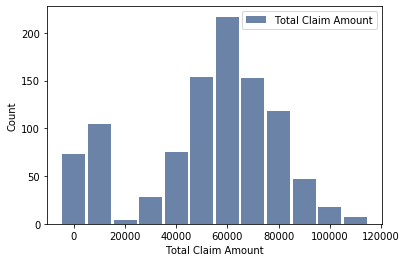

In [17]:
totalClaimAmt = np.around(dfClaims.total_claim_amount, decimals=-4)
histTotClaimAmt = thinkstats2.Hist(totalClaimAmt, label='Total Claim Amount')
thinkplot.Hist(histTotClaimAmt)
thinkplot.Config(xlabel='Total Claim Amount', ylabel='Count')

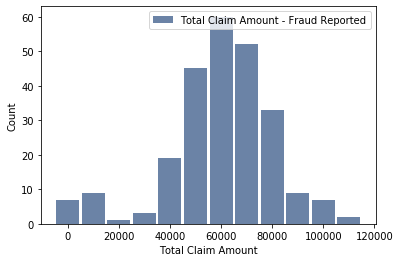

In [18]:
totalClaimAmtY = np.around(fraudY2.total_claim_amount, decimals=-4)
hist = thinkstats2.Hist(totalClaimAmtY, label='Total Claim Amount - Fraud Reported')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Total Claim Amount', ylabel='Count')

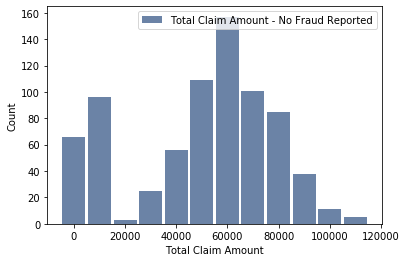

In [19]:
totalClaimAmtN = np.around(fraudN2.total_claim_amount, decimals=-4)
hist = thinkstats2.Hist(totalClaimAmtN, label='Total Claim Amount - No Fraud Reported')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Total Claim Amount', ylabel='Count')

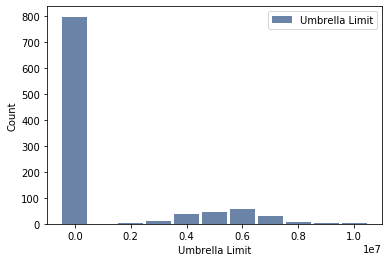

In [20]:
# after filtering out the negative outlier
histUmbrella = thinkstats2.Hist(dfClaims.umbrella_limit, label='Umbrella Limit')
thinkplot.Hist(histUmbrella)
thinkplot.Config(xlabel='Umbrella Limit', ylabel='Count')

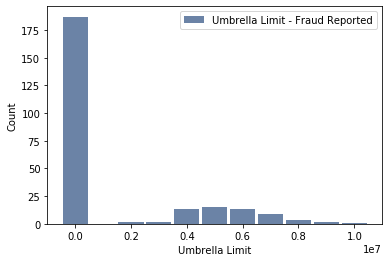

In [21]:
# after filtering out the negative outlier
histUmbrella = thinkstats2.Hist(fraudY2.umbrella_limit, label='Umbrella Limit - Fraud Reported')
thinkplot.Hist(histUmbrella)
thinkplot.Config(xlabel='Umbrella Limit', ylabel='Count')

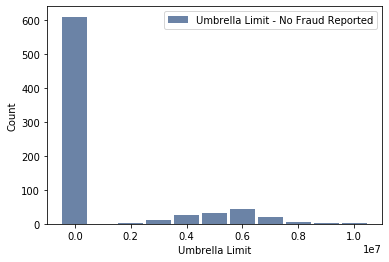

In [22]:
# after filtering out the negative outlier
histUmbrella = thinkstats2.Hist(fraudN2.umbrella_limit, label='Umbrella Limit - No Fraud Reported')
thinkplot.Hist(histUmbrella)
thinkplot.Config(xlabel='Umbrella Limit', ylabel='Count')

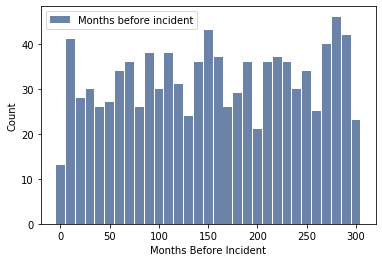

In [23]:
monthsBfInc = np.around(dfClaims.months_bf_incident, decimals=-1)
hist = thinkstats2.Hist(monthsBfInc, label='Months before incident')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Months Before Incident', ylabel='Count')

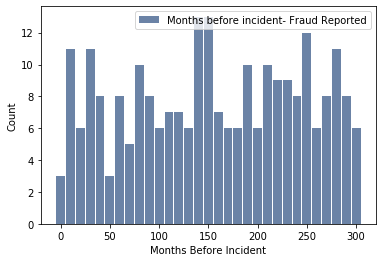

In [24]:
monthsBfIncY = np.around(fraudY2.months_bf_incident, decimals=-1)
hist = thinkstats2.Hist(monthsBfIncY, label='Months before incident- Fraud Reported')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Months Before Incident', ylabel='Count')

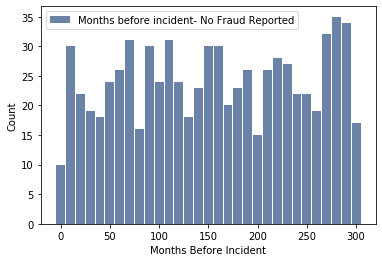

In [25]:
monthsBfIncN = np.around(fraudN2.months_bf_incident, decimals=-1)
hist = thinkstats2.Hist(monthsBfIncN, label='Months before incident- No Fraud Reported')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Months Before Incident', ylabel='Count')

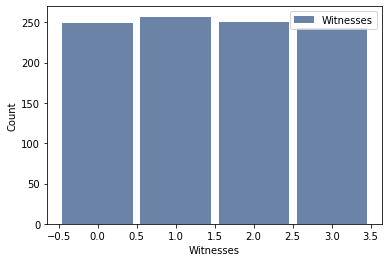

In [26]:
histWitnesses = thinkstats2.Hist(dfClaims.witnesses, label='Witnesses')
thinkplot.Hist(histWitnesses)
thinkplot.Config(xlabel='Witnesses', ylabel='Count')

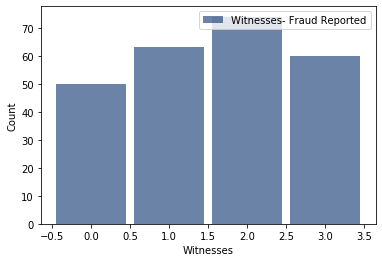

In [27]:
histWitnesses = thinkstats2.Hist(fraudY2.witnesses, label='Witnesses- Fraud Reported')
thinkplot.Hist(histWitnesses)
thinkplot.Config(xlabel='Witnesses', ylabel='Count')

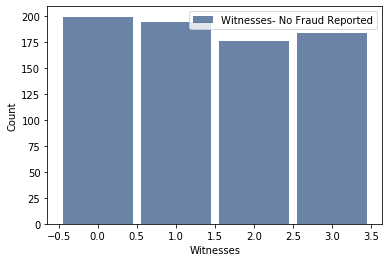

In [28]:
histWitnesses = thinkstats2.Hist(fraudN2.witnesses, label='Witnesses- No Fraud Reported')
thinkplot.Hist(histWitnesses)
thinkplot.Config(xlabel='Witnesses', ylabel='Count')

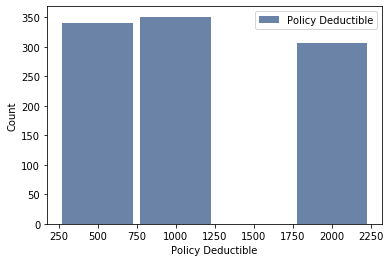

In [29]:
histPolDeduct = thinkstats2.Hist(dfClaims.policy_deductable, label='Policy Deductible')
thinkplot.Hist(histPolDeduct)
thinkplot.Config(xlabel='Policy Deductible', ylabel='Count')

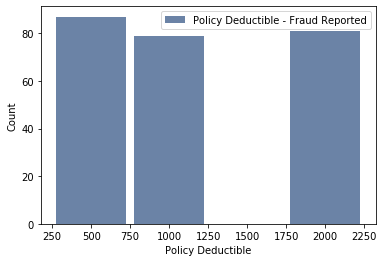

In [30]:
histPolDeduct = thinkstats2.Hist(fraudY2.policy_deductable, label='Policy Deductible - Fraud Reported')
thinkplot.Hist(histPolDeduct)
thinkplot.Config(xlabel='Policy Deductible', ylabel='Count')


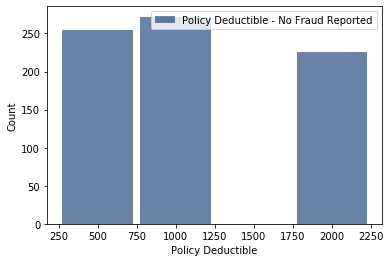

In [31]:
histPolDeduct = thinkstats2.Hist(fraudN2.policy_deductable, label='Policy Deductible - No Fraud Reported')
thinkplot.Hist(histPolDeduct)
thinkplot.Config(xlabel='Policy Deductible', ylabel='Count')

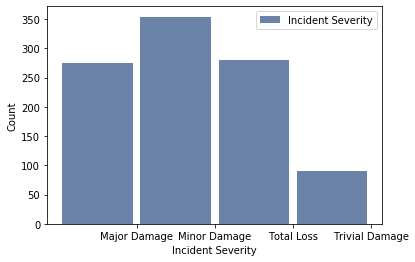

In [32]:
histIncSev = thinkstats2.Hist(dfClaims.incident_severity, label='Incident Severity')
thinkplot.Hist(histIncSev)
thinkplot.Config(xlabel='Incident Severity', ylabel='Count')

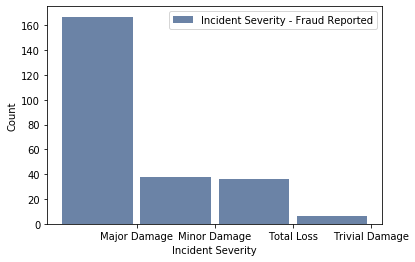

In [35]:
histIncSev = thinkstats2.Hist(fraudY2.incident_severity, label='Incident Severity - Fraud Reported')
thinkplot.Hist(histIncSev)
thinkplot.Config(xlabel='Incident Severity', ylabel='Count')

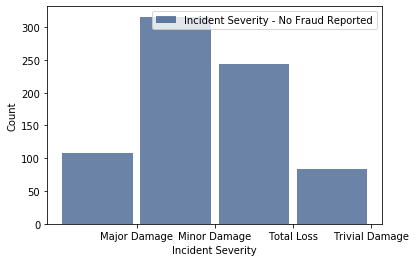

In [36]:
histIncSev = thinkstats2.Hist(fraudN2.incident_severity, label='Incident Severity - No Fraud Reported')
thinkplot.Hist(histIncSev)
thinkplot.Config(xlabel='Incident Severity', ylabel='Count')


In [37]:
# Create new dataset with quantitative variables
dfClaims_quant = dfClaims.filter(['months_bf_incident', 'total_claim_amount', 'witnesses', 'policy_deductable', 'umbrella_limit'], axis=1)
dfClaims_quant.describe()

,months_bf_incident,total_claim_amount,vehicle_claim,witnesses,number_of_vehicles_involved,policy_deductable,umbrella_limit
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,155.622634,52720.500501,37898.368368,1.487487,1.839840,1136.636637,1.103103e+06
std,88.269144,26382.199299,18870.924206,1.111785,1.019044,611.839681,2.297594e+06
min,-0.657098,100.000000,70.000000,0.000000,1.000000,500.000000,0.000000e+00
25%,81.545822,41775.000000,30275.000000,1.000000,1.000000,500.000000,0.000000e+00
50%,153.662293,57970.000000,42080.000000,1.000000,1.000000,1000.000000,0.000000e+00
75%,232.185466,70550.000000,50775.000000,2.000000,3.000000,2000.000000,0.000000e+00
max,301.344997,114920.000000,79560.000000,3.000000,4.000000,2000.000000,1.000000e+07


In [38]:
# Create new dataset with quantitative variables - fraud reported
fraudY2_quant = fraudY2.filter(['months_bf_incident', 'total_claim_amount', 'vehicle_claim', 'witnesses', 'number_of_vehicles_involved', 'policy_deductable', 'umbrella_limit'], axis=1)
fraudY2_quant.describe()

,months_bf_incident,total_claim_amount,vehicle_claim,witnesses,number_of_vehicles_involved,policy_deductable,umbrella_limit
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,155.847076,60302.105263,43533.643725,1.582996,1.931174,1151.821862,1.336032e+06
std,87.874222,20746.279567,14849.388907,1.066962,1.047315,628.123674,2.494799e+06
min,2.694100,2860.000000,2080.000000,0.000000,1.000000,500.000000,0.000000e+00
25%,82.958582,51910.000000,37170.000000,1.000000,1.000000,500.000000,0.000000e+00
50%,152.380952,61290.000000,44800.000000,2.000000,1.000000,1000.000000,0.000000e+00
75%,233.368242,72665.000000,52080.000000,2.000000,3.000000,2000.000000,0.000000e+00
max,299.767962,112320.000000,77760.000000,3.000000,4.000000,2000.000000,1.000000e+07


In [39]:
# Create new dataset with quantitative variables - no fraud reported
fraudN2_quant = fraudN2.filter(['months_bf_incident', 'total_claim_amount', 'vehicle_claim', 'witnesses', 'number_of_vehicles_involved', 'policy_deductable', 'umbrella_limit'], axis=1)
fraudN2_quant.describe()

,months_bf_incident,total_claim_amount,vehicle_claim,witnesses,number_of_vehicles_involved,policy_deductable,umbrella_limit
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,7.520000e+02
mean,155.548915,50230.265957,36047.420213,1.456117,1.809840,1131.648936,1.026596e+06
std,88.456660,27547.003973,19675.642596,1.125040,1.008491,606.738410,2.225463e+06
min,-0.657098,100.000000,70.000000,0.000000,1.000000,500.000000,0.000000e+00
25%,80.428756,34650.000000,25200.000000,0.000000,1.000000,500.000000,0.000000e+00
50%,154.762931,56475.000000,41190.000000,1.000000,1.000000,1000.000000,0.000000e+00
75%,232.111542,69480.000000,49935.000000,2.000000,3.000000,2000.000000,0.000000e+00
max,301.344997,114920.000000,79560.000000,3.000000,4.000000,2000.000000,1.000000e+07


In [40]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [41]:
# compute kurtosis and skew statistics
monthsStats = scipy.stats.describe(dfClaims.months_bf_incident, ddof=1, bias=False)
totalClaimStats = scipy.stats.describe(dfClaims.total_claim_amount, ddof=1, bias=False)
vehicleClaimStats = scipy.stats.describe(dfClaims.vehicle_claim, ddof=1, bias=False)
numVehiclesStats = scipy.stats.describe(dfClaims.number_of_vehicles_involved, ddof=1, bias=False)
umbrellaStats = scipy.stats.describe(dfClaims.umbrella_limit, ddof=1, bias=False)
deductibleStats = scipy.stats.describe(dfClaims.policy_deductable, ddof=1, bias=False)
witnessesStats = scipy.stats.describe(dfClaims.witnesses, ddof=1, bias=False)
monthsStatsY = scipy.stats.describe(fraudY2.months_bf_incident, ddof=1, bias=False)
totalClaimStatsY = scipy.stats.describe(fraudY2.total_claim_amount, ddof=1, bias=False)
vehicleClaimStatsY = scipy.stats.describe(fraudY2.vehicle_claim, ddof=1, bias=False)
numVehiclesStatsY = scipy.stats.describe(fraudY2.number_of_vehicles_involved, ddof=1, bias=False)
umbrellaStatsY = scipy.stats.describe(fraudY2.umbrella_limit, ddof=1, bias=False)
deductibleStatsY = scipy.stats.describe(fraudY2.policy_deductable, ddof=1, bias=False)
witnessesStatsY = scipy.stats.describe(fraudY2.witnesses, ddof=1, bias=False)
monthsStatsN = scipy.stats.describe(fraudN2.months_bf_incident, ddof=1, bias=False)
totalClaimStatsN = scipy.stats.describe(fraudN2.total_claim_amount, ddof=1, bias=False)
vehicleClaimStatsN = scipy.stats.describe(fraudN2.vehicle_claim, ddof=1, bias=False)
numVehiclesStatsN = scipy.stats.describe(fraudN2.number_of_vehicles_involved, ddof=1, bias=False)
umbrellaStatsN = scipy.stats.describe(fraudN2.umbrella_limit, ddof=1, bias=False)
deductibleStatsN = scipy.stats.describe(fraudN2.policy_deductable, ddof=1, bias=False)
witnessesStatsN = scipy.stats.describe(fraudN2.witnesses, ddof=1, bias=False)

In [42]:
from tabulate import tabulate
statsQuant = [["Months before incident", dfClaims.months_bf_incident.mode(), dfClaims.months_bf_incident.var(), dfClaims.months_bf_incident.max() - dfClaims.months_bf_incident.min(), monthsStats.skewness, monthsStats.kurtosis], 
              ['Total Claim Amount', dfClaims.total_claim_amount.mode(), dfClaims.total_claim_amount.var(), dfClaims.total_claim_amount.max() - dfClaims.total_claim_amount.min(), totalClaimStats.skewness, totalClaimStats.kurtosis], 
              ['Vehicle Claim Amounts', dfClaims.vehicle_claim.mode(), dfClaims.vehicle_claim.var(), dfClaims.vehicle_claim.max() - dfClaims.vehicle_claim.min(), vehicleClaimStats.skewness, vehicleClaimStats.kurtosis], 
              ['Vehicles Involved', dfClaims.number_of_vehicles_involved.mode(), dfClaims.number_of_vehicles_involved.var(), dfClaims.number_of_vehicles_involved.max() - dfClaims.number_of_vehicles_involved.min(), numVehiclesStats.skewness, numVehiclesStats.kurtosis], 
              ['Umbrella Limit', dfClaims.umbrella_limit.mode(), dfClaims.umbrella_limit.var(), dfClaims.umbrella_limit.max() - dfClaims.umbrella_limit.min(), umbrellaStats.skewness, umbrellaStats.kurtosis], 
              ['Deductable Amount', dfClaims.policy_deductable.mode(), dfClaims.policy_deductable.var(), dfClaims.policy_deductable.max() - dfClaims.policy_deductable.min(), deductibleStats.skewness, deductibleStats.kurtosis], 
              ['Witnesses', dfClaims.witnesses.mode(), dfClaims.witnesses.var(), dfClaims.witnesses.max() - dfClaims.witnesses.min(), witnessesStats.skewness, witnessesStats.kurtosis]]
tableQuant = tabulate(statsQuant, headers=['Variable', 'Mode', 'Variance', 'Range', 'Skewness', 'Kurtosis'], tablefmt='orgtbl')
print(tableQuant)

| Variable               |       Mode |         Variance |      Range |   Skewness |   Kurtosis |
|------------------------+------------+------------------+------------+------------+------------|
| Months before incident |    62.3914 |   7791.44        |    302.002 | -0.0508087 |  -1.20225  |
| Total Claim Amount     | 59400      |      6.9602e+08  | 114820     | -0.595646  |  -0.453894 |
| Vehicle Claim Amounts  |  5040      |      3.56112e+08 |  79490     | -0.622627  |  -0.446648 |
| Vehicles Involved      |     1      |      1.03845     |      3     |  0.501009  |  -1.50205  |
| Umbrella Limit         |     0      |      5.27894e+12 |      1e+07 |  1.8061    |   1.78799  |
| Deductable Amount      |  1000      | 374348           |   1500     |  0.476426  |  -1.37821  |
| Witnesses              |     1      |      1.23607     |      3     |  0.0183986 |  -1.34473  |


In [43]:
statsQuantY = [["Months before incident", fraudY2.months_bf_incident.mode(), fraudY2.months_bf_incident.var(), fraudY2.months_bf_incident.max() - fraudY2.months_bf_incident.min(), monthsStatsY.skewness, monthsStatsY.kurtosis], 
              ['Total Claim Amount', fraudY2.total_claim_amount.mode(), fraudY2.total_claim_amount.var(), fraudY2.total_claim_amount.max() - fraudY2.total_claim_amount.min(), totalClaimStatsY.skewness, totalClaimStatsY.kurtosis], 
              ['Vehicle Claim Amounts', fraudY2.vehicle_claim.mode(), fraudY2.vehicle_claim.var(), fraudY2.vehicle_claim.max() - fraudY2.vehicle_claim.min(), vehicleClaimStatsY.skewness, vehicleClaimStatsY.kurtosis], 
              ['Vehicles Involved', fraudY2.number_of_vehicles_involved.mode(), fraudY2.number_of_vehicles_involved.var(), fraudY2.number_of_vehicles_involved.max() - fraudY2.number_of_vehicles_involved.min(), numVehiclesStatsY.skewness, numVehiclesStatsY.kurtosis], 
              ['Umbrella Limit', fraudY2.umbrella_limit.mode(), fraudY2.umbrella_limit.var(), fraudY2.umbrella_limit.max() - fraudY2.umbrella_limit.min(), umbrellaStatsY.skewness, umbrellaStatsY.kurtosis], 
              ['Deductable Amount', fraudY2.policy_deductable.mode(), fraudY2.policy_deductable.var(), fraudY2.policy_deductable.max() - fraudY2.policy_deductable.min(), deductibleStatsY.skewness, deductibleStatsY.kurtosis], 
              ['Witnesses', fraudY2.witnesses.mode(), fraudY2.witnesses.var(), fraudY2.witnesses.max() - fraudY2.witnesses.min(), witnessesStatsY.skewness, witnessesStatsY.kurtosis]]
tableQuantY = tabulate(statsQuantY, headers=['Variable', 'Mode', 'Variance', 'Range', 'Skewness', 'Kurtosis'], tablefmt='orgtbl')
print(tableQuantY)

| Variable               | Mode           |         Variance |      Range |   Skewness |   Kurtosis |
|------------------------+----------------+------------------+------------+------------+------------|
| Months before incident | 0    62.391425 |   7721.88        |    297.074 |  -0.103498 |   -1.18728 |
|                        | dtype: float64 |                  |            |            |            |
| Total Claim Amount     | 0    55000     |      4.30408e+08 | 109460     |  -0.820915 |    1.39238 |
|                        | 1    59400     |                  |            |            |            |
|                        | 2    75400     |                  |            |            |            |
|                        | dtype: int64   |                  |            |            |            |
| Vehicle Claim Amounts  | 0    38850     |      2.20504e+08 |  75680     |  -0.843381 |    1.49067 |
|                        | 1    45360     |                  |            |       

In [44]:
statsQuantN = [["Months before incident", fraudN2.months_bf_incident.mode(), fraudN2.months_bf_incident.var(), fraudN2.months_bf_incident.max() - fraudN2.months_bf_incident.min(), monthsStatsN.skewness, monthsStatsN.kurtosis], 
              ['Total Claim Amount', fraudN2.total_claim_amount.mode(), fraudN2.total_claim_amount.var(), fraudN2.total_claim_amount.max() - fraudN2.total_claim_amount.min(), totalClaimStatsN.skewness, totalClaimStatsN.kurtosis], 
              ['Vehicle Claim Amounts', fraudN2.vehicle_claim.mode(), fraudN2.vehicle_claim.var(), fraudN2.vehicle_claim.max() - fraudN2.vehicle_claim.min(), vehicleClaimStatsN.skewness, vehicleClaimStatsN.kurtosis], 
              ['Vehicles Involved', fraudN2.number_of_vehicles_involved.mode(), fraudN2.number_of_vehicles_involved.var(), fraudN2.number_of_vehicles_involved.max() - fraudN2.number_of_vehicles_involved.min(), numVehiclesStatsN.skewness, numVehiclesStatsN.kurtosis], 
              ['Umbrella Limit', fraudN2.umbrella_limit.mode(), fraudN2.umbrella_limit.var(), fraudN2.umbrella_limit.max() - fraudN2.umbrella_limit.min(), umbrellaStatsN.skewness, umbrellaStatsN.kurtosis], 
              ['Deductable Amount', fraudN2.policy_deductable.mode(), fraudN2.policy_deductable.var(), fraudN2.policy_deductable.max() - fraudN2.policy_deductable.min(), deductibleStatsN.skewness, deductibleStatsN.kurtosis], 
              ['Witnesses', fraudN2.witnesses.mode(), fraudN2.witnesses.var(), fraudN2.witnesses.max() - fraudN2.witnesses.min(), witnessesStatsN.skewness, witnessesStatsN.kurtosis]]
tableQuantN = tabulate(statsQuantN, headers=['Variable', 'Mode', 'Variance', 'Range', 'Skewness', 'Kurtosis'], tablefmt='orgtbl')
print(tableQuantN)

| Variable               | Mode             |         Variance |      Range |   Skewness |   Kurtosis |
|------------------------+------------------+------------------+------------+------------+------------|
| Months before incident | 0      18.792994 |   7824.58        |    302.002 | -0.0340399 |  -1.20685  |
|                        | 1      24.772583 |                  |            |            |            |
|                        | 2      53.619171 |                  |            |            |            |
|                        | 3      54.243414 |                  |            |            |            |
|                        | 4      62.161441 |                  |            |            |            |
|                        | 5      81.677242 |                  |            |            |            |
|                        | 6      94.424937 |                  |            |            |            |
|                        | 7      94.753486 |                  |

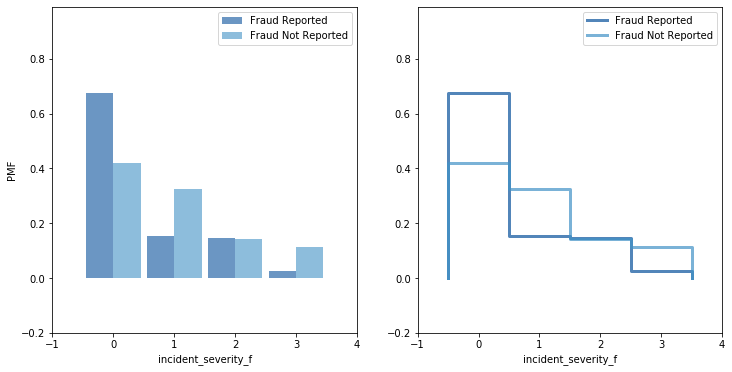

In [48]:
# pmf
# Here are the distributions of incident severity for fraud reported and fraud not reported.
fraudY_pmfSev = thinkstats2.Pmf(fraudY2.incident_severity_f, label='Fraud Reported')
fraudN_pmfSev = thinkstats2.Pmf(fraudN2.incident_severity_f, label='Fraud Not Reported')

# code to plot bar graphs and step function PMFs.
width=0.45
axis = [-1, 4, -0.20, 0.99]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(fraudY_pmfSev, align='right', width=width)
thinkplot.Hist(fraudN_pmfSev, align='left', width=width)
thinkplot.Config(xlabel='incident_severity_f', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([fraudY_pmfSev, fraudN_pmfSev])
thinkplot.Config(xlabel='incident_severity_f', axis=axis)

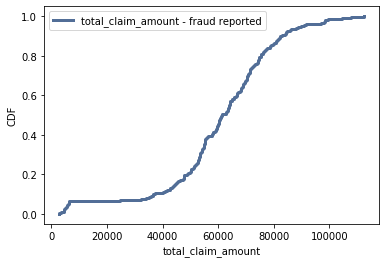

In [51]:
# plot cdf = fraud reported
cdfTCY = thinkstats2.Cdf(fraudY2.total_claim_amount, label='total_claim_amount - fraud reported')
thinkplot.Cdf(cdfTCY)
thinkplot.Config(xlabel='total_claim_amount', ylabel='CDF', loc='upper left')

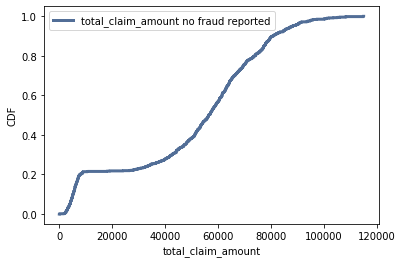

In [52]:
# plot cdf = no fraud reported
cdfTCN = thinkstats2.Cdf(fraudN2.total_claim_amount, label='total_claim_amount no fraud reported')
thinkplot.Cdf(cdfTCN)
thinkplot.Config(xlabel='total_claim_amount', ylabel='CDF', loc='upper left')

((array([-2.77005632, -2.46756954, -2.29577765, -2.17308639, -2.07637768,
         -1.99590511, -1.92660022, -1.86547617, -1.81061863, -1.76072402,
         -1.71486302, -1.6723488 , -1.63265879, -1.59538576, -1.56020597,
         -1.52685756, -1.49512565, -1.46483159, -1.43582519, -1.40797894,
         -1.38118357, -1.35534475, -1.33038042, -1.30621874, -1.28279645,
         -1.26005751, -1.23795207, -1.21643554, -1.1954679 , -1.17501306,
         -1.15503839, -1.13551422, -1.11641358, -1.09771179, -1.07938624,
         -1.0614162 , -1.04378253, -1.02646759, -1.00945504, -0.99272975,
         -0.97627766, -0.96008565, -0.94414154, -0.92843389, -0.91295205,
         -0.89768599, -0.88262633, -0.86776423, -0.85309137, -0.83859992,
         -0.82428248, -0.81013204, -0.79614199, -0.78230606, -0.76861829,
         -0.75507303, -0.74166492, -0.72838883, -0.7152399 , -0.70221349,
         -0.68930516, -0.67651067, -0.66382599, -0.65124723, -0.63877068,
         -0.62639278, -0.61411012, -0.

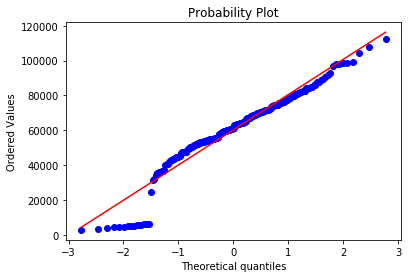

In [53]:
# probability plot
stats.probplot(fraudY2.total_claim_amount, plot= plt)

((array([-3.11449077e+00, -2.84275361e+00, -2.69067103e+00, -2.58319028e+00,
         -2.49919966e+00, -2.42983495e+00, -2.37050124e+00, -2.31849806e+00,
         -2.27209865e+00, -2.23012965e+00, -2.19175612e+00, -2.15636205e+00,
         -2.12347952e+00, -2.09274444e+00, -2.06386774e+00, -2.03661596e+00,
         -2.01079773e+00, -1.98625415e+00, -1.96285182e+00, -1.94047756e+00,
         -1.91903454e+00, -1.89843922e+00, -1.87861902e+00, -1.85951048e+00,
         -1.84105772e+00, -1.82321137e+00, -1.80592748e+00, -1.78916683e+00,
         -1.77289422e+00, -1.75707796e+00, -1.74168942e+00, -1.72670259e+00,
         -1.71209385e+00, -1.69784162e+00, -1.68392615e+00, -1.67032931e+00,
         -1.65703445e+00, -1.64402618e+00, -1.63129030e+00, -1.61881366e+00,
         -1.60658403e+00, -1.59459008e+00, -1.58282123e+00, -1.57126762e+00,
         -1.55992001e+00, -1.54876980e+00, -1.53780888e+00, -1.52702966e+00,
         -1.51642500e+00, -1.50598819e+00, -1.49571289e+00, -1.48559313e+00,

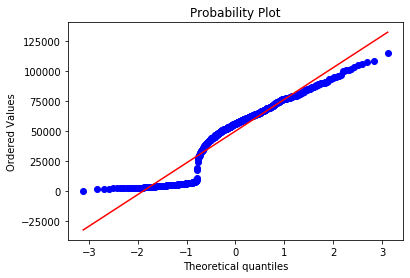

In [54]:
# probability plot
stats.probplot(fraudN2.total_claim_amount, plot= plt)

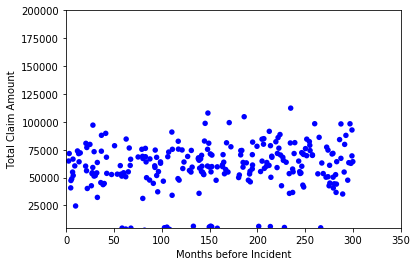

In [55]:
# scatter plot
# use thinkpot's Scatter to create scatter plot

thinkplot.Scatter(fraudY2['months_bf_incident'], fraudY2['total_claim_amount'], alpha=1)
thinkplot.Config(xlabel='Months before Incident',
                 ylabel='Total Claim Amount',
                 axis=[0, 350, 5000, 200000],
                 legend=False)

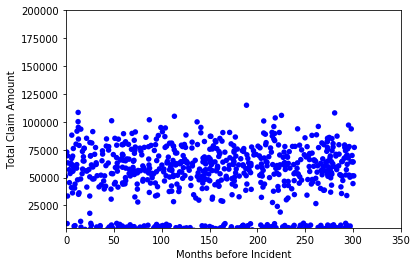

In [56]:
# scatter plot
# use thinkpot's Scatter to create scatter plot

thinkplot.Scatter(fraudN2['months_bf_incident'], fraudN2['total_claim_amount'], alpha=1)
thinkplot.Config(xlabel='Months before Incident',
                 ylabel='Total Claim Amount',
                 axis=[0, 350, 5000, 200000],
                 legend=False)

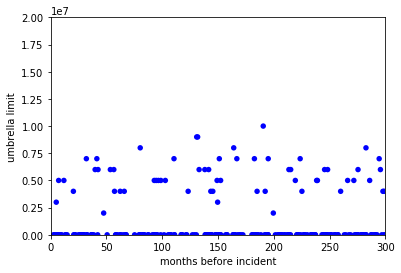

In [57]:
# scatter plot
# use thinkpot's Scatter to create scatter plot

thinkplot.Scatter(fraudY2['months_bf_incident'], fraudY2['umbrella_limit'], alpha=1)
thinkplot.Config(xlabel='months before incident',
                 ylabel='umbrella limit',
                 axis=[0, 300, 0, 20000000],
                 legend=False)

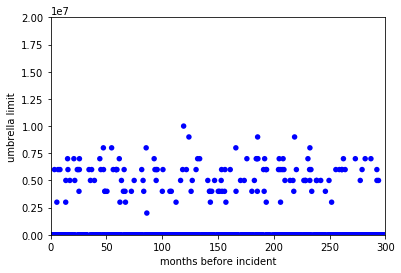

In [58]:
# scatter plot
# use thinkpot's Scatter to create scatter plot

thinkplot.Scatter(fraudN2['months_bf_incident'], fraudN2['umbrella_limit'], alpha=1)
thinkplot.Config(xlabel='months before incident',
                 ylabel='umbrella limit',
                 axis=[0, 300, 0, 20000000],
                 legend=False)

In [77]:
# Create new dataset with quantitative variables - full dataframe
dfClaims_quant = dfClaims.filter(['months_bf_incident', 'total_claim_amount', 'witnesses', 'policy_deductable', 'umbrella_limit'], axis=1)
dfClaims_quant.corr()

,months_bf_incident,total_claim_amount,witnesses,policy_deductable,umbrella_limit
months_bf_incident,1.000000,-0.002242,-0.056202,0.051403,-0.045374
total_claim_amount,-0.002242,1.000000,-0.010440,0.024516,-0.038972
witnesses,-0.056202,-0.010440,1.000000,0.066224,-0.007144
policy_deductable,0.051403,0.024516,0.066224,1.000000,0.009927
umbrella_limit,-0.045374,-0.038972,-0.007144,0.009927,1.000000


In [78]:
# Create new dataset with quantitative variables - full dataframe
fraudY2_quant = fraudY2.filter(['months_bf_incident', 'total_claim_amount', 'witnesses', 'policy_deductable', 'umbrella_limit'], axis=1)
fraudY2_quant.corr()

,months_bf_incident,total_claim_amount,witnesses,policy_deductable,umbrella_limit
months_bf_incident,1.000000,0.132688,-0.080317,0.002766,0.006353
total_claim_amount,0.132688,1.000000,0.037589,-0.104484,-0.022993
witnesses,-0.080317,0.037589,1.000000,0.031163,-0.037245
policy_deductable,0.002766,-0.104484,0.031163,1.000000,-0.011936
umbrella_limit,0.006353,-0.022993,-0.037245,-0.011936,1.000000


In [79]:
# Create new dataset with quantitative variables - full dataframe
fraudN2_quant = fraudN2.filter(['months_bf_incident', 'total_claim_amount', 'witnesses', 'policy_deductable', 'umbrella_limit'], axis=1)
fraudN2_quant.corr()

,months_bf_incident,total_claim_amount,witnesses,policy_deductable,umbrella_limit
months_bf_incident,1.000000,-0.035670,-0.048958,0.067778,-0.064554
total_claim_amount,-0.035670,1.000000,-0.032133,0.055139,-0.057434
witnesses,-0.048958,-0.032133,1.000000,0.076749,-0.000597
policy_deductable,0.067778,0.055139,0.076749,1.000000,0.017126
umbrella_limit,-0.064554,-0.057434,-0.000597,0.017126,1.000000


In [81]:
pbc = stats.pointbiserialr(dfClaims.fraud_reported_f, dfClaims.total_claim_amount)
pbc

PointbiserialrResult(correlation=-0.16478101492025085, pvalue=1.627232492099993e-07)

In [82]:
pbc = stats.pointbiserialr(dfClaims.fraud_reported_f, dfClaims.umbrella_limit)
pbc

PointbiserialrResult(correlation=-0.05813100524817261, pvalue=0.06626935848682936)

In [83]:
pbc = stats.pointbiserialr(dfClaims.fraud_reported_f, dfClaims.months_bf_incident)
pbc

PointbiserialrResult(correlation=-0.0014579814179212156, pvalue=0.9632905687387004)

In [84]:
pbc = stats.pointbiserialr(dfClaims.fraud_reported_f, dfClaims.witnesses)
pbc

PointbiserialrResult(correlation=-0.04925815127227322, pvalue=0.11973286668807653)

In [85]:
pbc = stats.pointbiserialr(dfClaims.fraud_reported_f, dfClaims.policy_deductable)
pbc

PointbiserialrResult(correlation=-0.014231171157091445, pvalue=0.6532414524704065)

In [61]:
# To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and 
# generate simulated results by shuffling the data

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
data = fraudY2['umbrella_limit'], fraudN2['umbrella_limit']
ht = DiffMeansPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.076

In [73]:
# To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and 
# generate simulated results by shuffling the data

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
data = fraudY2['policy_deductable'], fraudN2['policy_deductable']
ht = DiffMeansPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.662

In [74]:
# To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and 
# generate simulated results by shuffling the data

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
data = fraudY2['total_claim_amount'], fraudN2['total_claim_amount']
ht = DiffMeansPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.0

In [75]:
# To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and 
# generate simulated results by shuffling the data

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
data = fraudY2['months_bf_incident'], fraudN2['months_bf_incident']
ht = DiffMeansPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.958

In [76]:
# To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and 
# generate simulated results by shuffling the data

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
data = fraudY2['witnesses'], fraudN2['witnesses']
ht = DiffMeansPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.13

In [66]:
# Testing correlation
#stats.pointbiserialr()
# To check whether an observed correlation is statistically significant, we can run a permutation test 
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = stats.pointbiserialr(xs, ys)
        return test_stat[0]

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

data = dfClaims['fraud_reported_f'], dfClaims['umbrella_limit']
ht = CorrelationPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.966

In [67]:
# Testing correlation
#stats.pointbiserialr()
# To check whether an observed correlation is statistically significant, we can run a permutation test 
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = stats.pointbiserialr(xs, ys)
        return test_stat[0]

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

data = dfClaims['fraud_reported_f'], dfClaims['total_claim_amount']
ht = CorrelationPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

1.0

In [68]:
#stats.pointbiserialr()
# To check whether an observed correlation is statistically significant, we can run a permutation test 
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = stats.pointbiserialr(xs, ys)
        return test_stat[0]

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

data = dfClaims['fraud_reported_f'], dfClaims['months_bf_incident']
ht = CorrelationPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.523

In [69]:
#stats.pointbiserialr()
# To check whether an observed correlation is statistically significant, we can run a permutation test 
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = stats.pointbiserialr(xs, ys)
        return test_stat[0]

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

data = dfClaims['fraud_reported_f'], dfClaims['witnesses']
ht = CorrelationPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.953

In [71]:
#stats.pointbiserialr()
# To check whether an observed correlation is statistically significant, we can run a permutation test 
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = stats.pointbiserialr(xs, ys)
        return test_stat[0]

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

data = dfClaims['fraud_reported_f'], dfClaims['policy_deductable']
ht = CorrelationPermute(data)
pvalue = ht.PValue(iters=1000)
pvalue

0.685

In [ ]:
import patsy
formulaLog = 'fraud_reported_f ~ months_as_customer + age + policy_number + policy_state_f + policy_deductable + policy_annual_premium + umbrella_limit + insured_zip + insured_sex_f + insured_education_level_f + insured_occupation_f + insured_hobbies_f + insured_relationship_f + capital_gains + capital_loss + incident_type_f + collision_type_f + incident_severity_f + authorities_contacted_f + incident_state_f + incident_city_f + incident_hour_of_the_day + number_of_vehicles_involved + property_damage_f + bodily_injuries + witnesses + police_report_available_f + total_claim_amount + injury_claim + property_claim + auto_make_f + auto_model_f + auto_year + csl_prop + csl_bodily + months_bf_incident'
modelLog = smf.logit(formulaLog, data=dfClaims)
resultsLog = modelLog.fit()
resultsLog.summary()